<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Building Autoencoders**


Estimated time needed: **30** minutes


In this lab, you will learn how to build autoencoders using Keras.  


## Learning Objectives

By the end of this lab, you will: 

- Load and preprocess the MNIST dataset for training an autoencoder. 

- Construct a simple autoencoder model using the Keras functional API. 

- Train the autoencoder on the MNIST dataset. 

- Evaluate the performance of the trained autoencoder. 

- Fine-tune the autoencoder to improve its performance. 

- Use the autoencoder to denoise images. 


----


### Step-by-Step Instructions: 

#### Step 1: Data Preprocessing 

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector. 


In [1]:
!pip install tensorflow==2.16.2

In [2]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

2025-03-04 00:19:27.387169: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-04 00:19:27.406064: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-04 00:19:27.424138: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-04 00:19:27.506830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-04 00:19:27.708606: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In the above code: 
- Use Keras to load the MNIST dataset. 
- Normalize the image pixel values to the range [0, 1]. 
- Flatten the 28x28 images to a 784-dimensional vector to reshape the data. 


#### Step 2: Building the Autoencoder Model 

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss. 


In [3]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In the above code: 

**1. Define the Encoder:**
- Create an input layer with 784 neurons. 
- Add a Dense layer with 64 neurons and ReLU activation. 

**2. Define the Bottleneck:**
- Add a Dense layer with 32 neurons and ReLU activation. 

**3. Define the Decoder:**
- Add a Dense layer with 64 neurons and ReLU activation. 
- Add an output layer with 784 neurons and sigmoid activation. 

**4. Compile the Model:**
- Use the Adam optimizer and binary crossentropy loss.  


#### Step 3: Training the Autoencoder 

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself. 


In [5]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0944 - val_loss: 0.0930
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0942 - val_loss: 0.0928
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0938 - val_loss: 0.0928
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0936 - val_loss: 0.0925
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0937 - val_loss: 0.0923
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0933 - val_loss: 0.0923
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0933 - val_loss: 0.0922
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0932 - val_loss: 0.0921
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0931 - val_loss: 0.0921
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0930 - val_loss: 0.0919
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0930 - val_loss: 0.0917
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In the above code: 
- Use the `fit` method to train the model on the training data. 
- Set the number of epochs to 25 and the batch size to 256.. 
- Use the test data for validation. 


#### Step 4: Evaluating the Autoencoder 

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 


In [6]:
!pip install matplotlib==3.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1
    Uninstalling matplotlib-3.10.1:
      Successfully uninstalled matplotlib-3.10.1


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


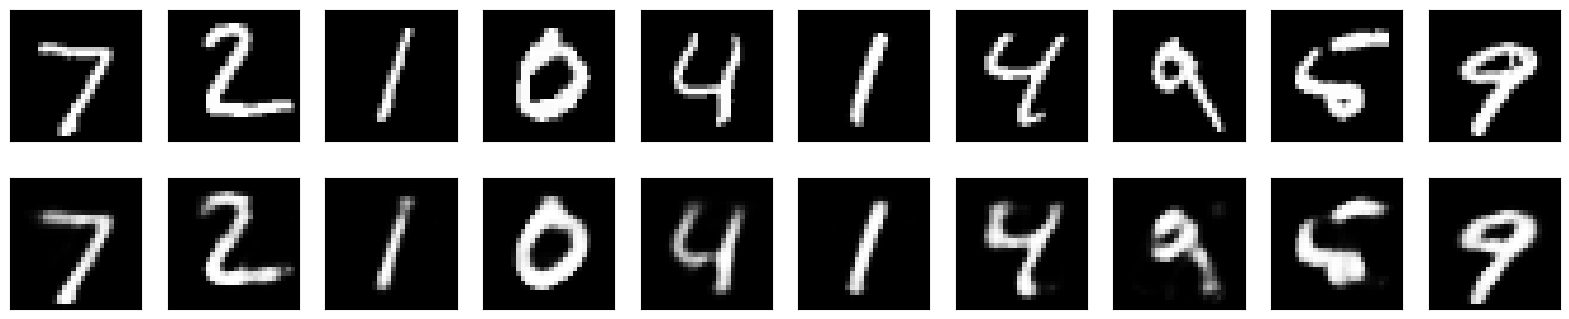

In [7]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


In the above code: 

**1. Reconstruct Images:**
- Use the autoencoder to predict the test data. 
- Compare the original test images with the reconstructed images. 

**2. Visualize the Results:**
- Plot a few examples of original and reconstructed images side by side. 


#### Step 5: Fine-Tuning the Autoencoder 

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.


In [8]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0931 - val_loss: 0.0904
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0914 - val_loss: 0.0905
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0912 - val_loss: 0.0905
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0915 - val_loss: 0.0904
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0911 - val_loss: 0.0902
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0912 - val_loss: 0.0904
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0911 - val_loss: 0.0901
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0908 - val_loss: 0.0902
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0910 - val_loss: 0.0900
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0906 - val_loss: 0.0899


In the above code: 

**1. Unfreeze the Encoder Layers:**
- Unfreeze the last four layers of the encoder. 

**2. Compile and Train the Model:**
- Recompile the model. 
- Train the model again for 10 epochs with the same training and validation data.


#### Step 6: Denoising Images with Autoencoder 

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images. 


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2450 - val_loss: 0.1589
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1553 - val_loss: 0.1446
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1430 - val_loss: 0.1372
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1364 - val_loss: 0.1323
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1322 - val_loss: 0.1296
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.1291 - val_loss: 0.1278
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1279 - val_loss: 0.1264
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1270 - val_loss: 0.1256
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1258 - val_loss: 0.1250
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.1253 - val_loss: 0.1242
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1242 - val_loss: 0.1239
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

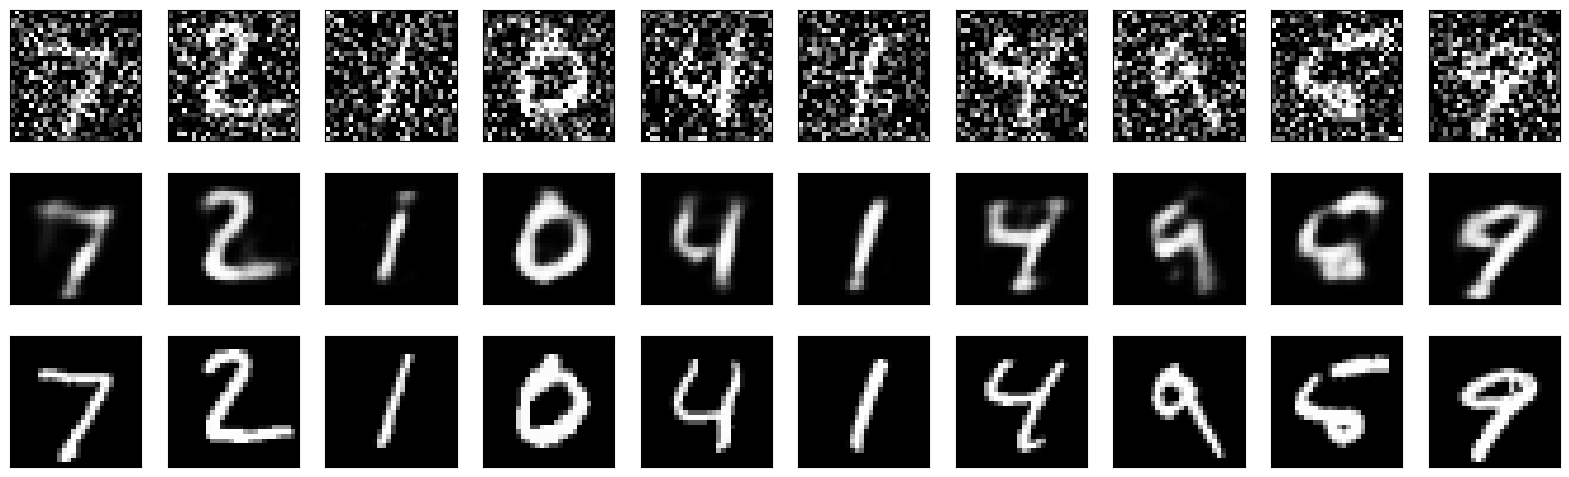

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code: 

**1. Add noise to the data:**
- Add random noise to the training and test data. 
- Train the Autoencoder with noisy data: 
-Train the autoencoder using the noisy images as input and the original images as target. 

**2. Evaluate the denoising performance:**
- Use the autoencoder to denoise the test images. 
- Compare the noisy, denoised, and original images. 


## Practice Exercises: 

### Exercise 1: Exploring Different Bottleneck Sizes 

#### Objective: 

To understand the impact of different bottleneck sizes on the performance of the autoencoder. 

#### Instructions: 

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 



🔹 Training Autoencoder with Bottleneck Size: 16
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.3391 - val_loss: 0.1590
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1528 - val_loss: 0.1352
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1337 - val_loss: 0.1262
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1269 - val_loss: 0.1220
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.1231 - val_loss: 0.1194
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1204 - val_loss: 0.1175
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1183 - val_loss: 0.1156
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1167 - val_loss: 0.1141
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1152 - val_loss: 0.1130
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1141 - val_loss: 0.1121
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1129 - val_loss

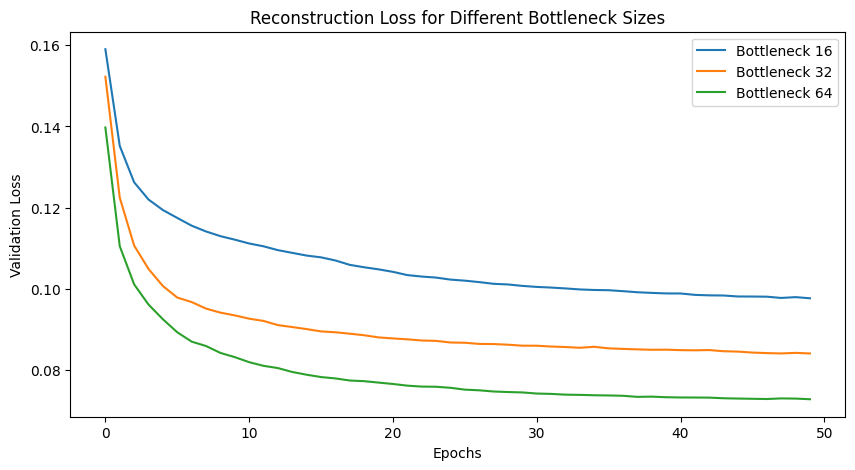


🔹 Visualizing Autoencoder with Bottleneck Size: 16
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


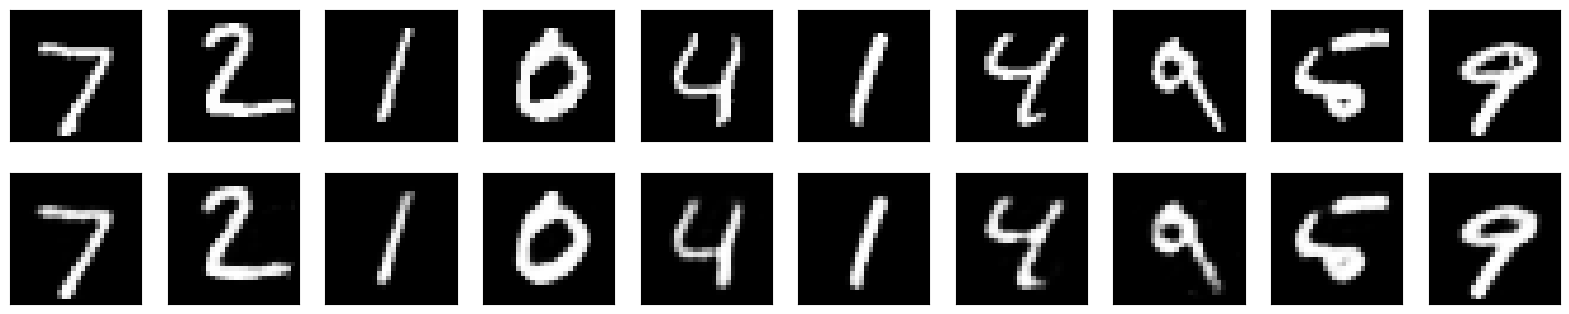


🔹 Visualizing Autoencoder with Bottleneck Size: 32
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


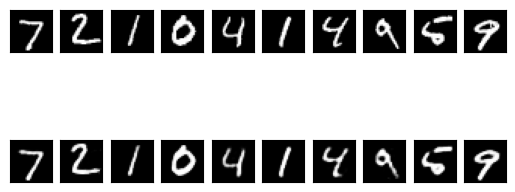


🔹 Visualizing Autoencoder with Bottleneck Size: 64
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


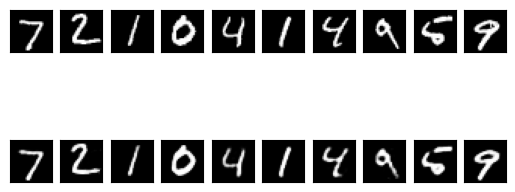

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define different bottleneck sizes
bottleneck_sizes = [16, 32, 64]
history_dict = {}

for bottleneck_size in bottleneck_sizes:
    print(f"\n🔹 Training Autoencoder with Bottleneck Size: {bottleneck_size}")

    # Define the autoencoder model
    input_layer = Input(shape=(784,))
    encoded = Dense(128, activation="relu")(input_layer)
    bottleneck = Dense(bottleneck_size, activation="relu")(encoded)  # Bottleneck Layer
    decoded = Dense(128, activation="relu")(bottleneck)
    output_layer = Dense(784, activation="sigmoid")(decoded)

    # Compile the autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

    # Train the model
    history = autoencoder.fit(
        x_train, x_train,
        epochs=50,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test),
        verbose=1
    )
    
    history_dict[bottleneck_size] = history.history["val_loss"]

    # Evaluate the model on test data
    test_loss = autoencoder.evaluate(x_test, x_test)
    print(f"🔹 Test Loss for Bottleneck Size {bottleneck_size}: {test_loss:.4f}")

plt.figure(figsize=(10, 5))
for bottleneck_size, loss_values in history_dict.items():
    plt.plot(loss_values, label=f"Bottleneck {bottleneck_size}")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Reconstruction Loss for Different Bottleneck Sizes")
plt.legend()
plt.show()
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))

for bottleneck_size in bottleneck_sizes:
    print(f"\n🔹 Visualizing Autoencoder with Bottleneck Size: {bottleneck_size}")

    # Define the encoder part of the model
    input_layer = Input(shape=(784,))
    encoded = Dense(128, activation="relu")(input_layer)
    bottleneck = Dense(bottleneck_size, activation="relu")(encoded)  # Bottleneck Layer
    encoder = Model(input_layer, bottleneck)  # Define encoder model

    # Pass the test images through the trained autoencoder
    reconstructed_images = autoencoder.predict(x_test)

    for i in range(n):
        # Display original images
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


<details>
    <summary>Click here for Solution</summary>

```python
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')
```

</details>


### Exercise 2 - Adding Regularization to the Autoencoder 
 
#### Objective: 

To explore the effect of regularization on the performance of the autoencoder. 

#### Instructions: 

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.5996 - val_loss: 0.2863
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2829 - val_loss: 0.2746
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2738 - val_loss: 0.2697
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.2703 - val_loss: 0.2673
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2681 - val_loss: 0.2661
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2663 - val_loss: 0.2648
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2653 - val_loss: 0.2640
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2644 - val_loss: 0.2628
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2641 - val_loss: 0.2628
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2625 - val_loss: 0.2615
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2623 - val_loss: 0.2608
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━

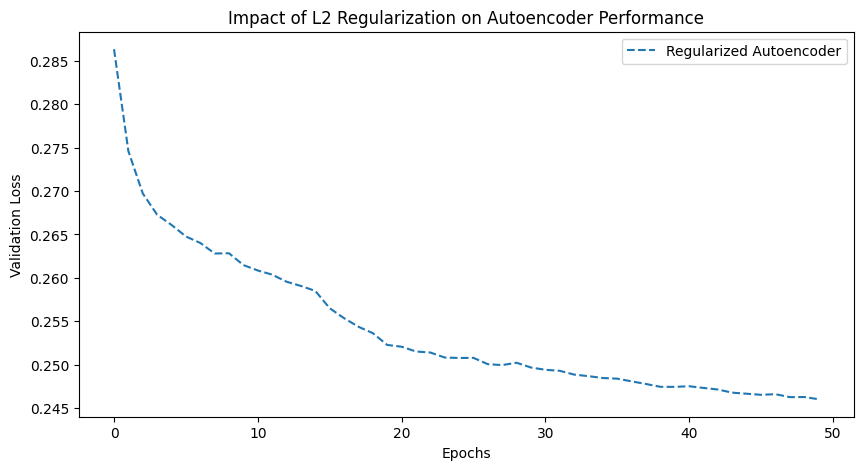

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


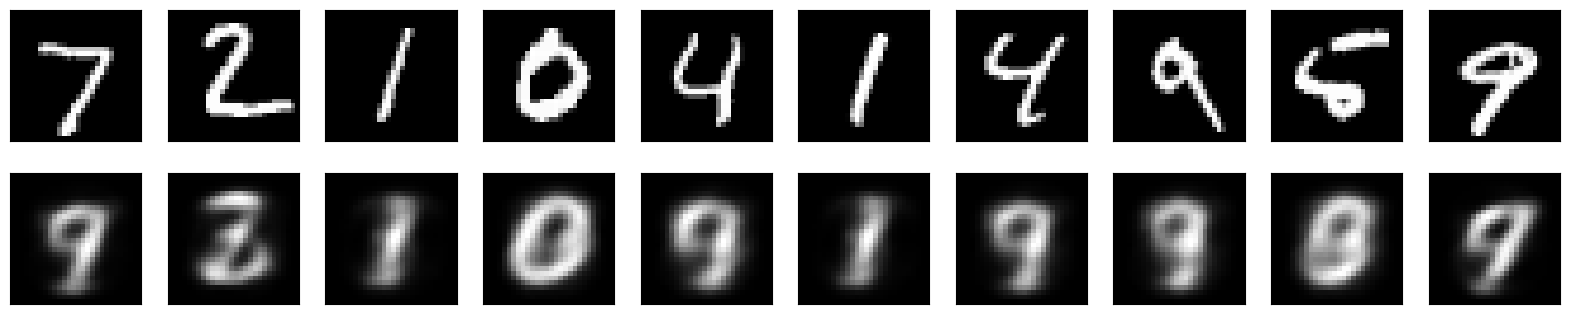

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define L2 regularization strength
l2_strength = 0.001

# Define the autoencoder model with L2 regularization
input_layer = Input(shape=(784,))
encoded = Dense(128, activation="relu", kernel_regularizer=l2(l2_strength))(input_layer)
bottleneck = Dense(32, activation="relu", kernel_regularizer=l2(l2_strength))(encoded)  # Bottleneck Layer
decoded = Dense(128, activation="relu", kernel_regularizer=l2(l2_strength))(bottleneck)
output_layer = Dense(784, activation="sigmoid", kernel_regularizer=l2(l2_strength))(decoded)

# Compile the regularized autoencoder
autoencoder_reg = Model(input_layer, output_layer)
autoencoder_reg.compile(optimizer="adam", loss="binary_crossentropy")

# Print model summary
autoencoder_reg.summary()

# Train the model
history_reg = autoencoder_reg.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

plt.figure(figsize=(10, 5))

# Plot regularized model loss
plt.plot(history_reg.history['val_loss'], label="Regularized Autoencoder", linestyle="--")

# Plot non-regularized model loss (if available)
if "val_loss" in locals():
    plt.plot(history.history['val_loss'], label="Non-Regularized Autoencoder", linestyle="-")

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Impact of L2 Regularization on Autoencoder Performance")
plt.legend()
plt.show()

# Predict reconstructed images with the regularized model
reconstructed_reg = autoencoder_reg.predict(x_test)

# Visualize the original vs. reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images (L2 regularized)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_reg[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}') 
```

</details>


### Exercise 3 - Visualizing Intermediate Representations 

#### Objective: 

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder. 

#### Instructions: 

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features. 

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space. 
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space. 


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,608 (408.62 KB)

 Trainable params: 104,608 (408.62 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Encoded Features Shape: (10000, 32)


/tmp/ipykernel_4876/1284540486.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(encoded_features[:, 0], encoded_features[:, 1], s=2, alpha=0.6, cmap="viridis")


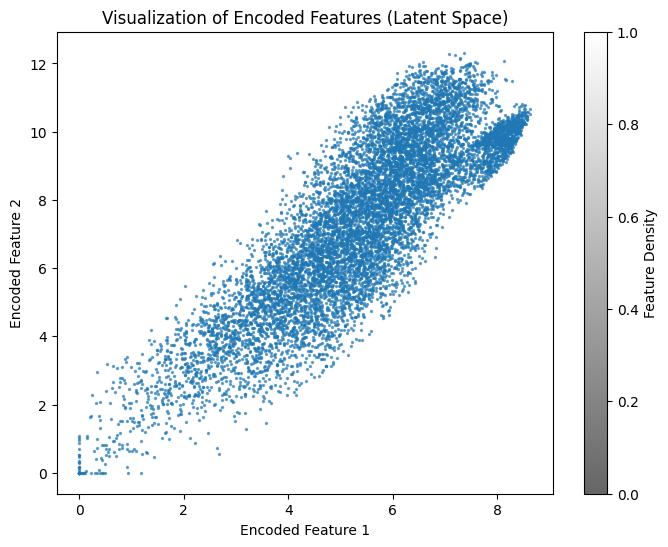

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Extract the encoder part from the trained autoencoder
encoder = Model(autoencoder_reg.input, autoencoder_reg.get_layer(index=2).output)  # Bottleneck layer index = 2

# Print encoder summary
encoder.summary()
# Encode the test data
encoded_features = encoder.predict(x_test)

# Print shape of encoded features
print(f"Encoded Features Shape: {encoded_features.shape}")
# Select first two dimensions for visualization
plt.figure(figsize=(8, 6))
plt.scatter(encoded_features[:, 0], encoded_features[:, 1], s=2, alpha=0.6, cmap="viridis")

plt.xlabel("Encoded Feature 1")
plt.ylabel("Encoded Feature 2")
plt.title("Visualization of Encoded Features (Latent Space)")
plt.colorbar(label="Feature Density")
plt.show()


<details>
    <summary>Click here for Solution</summary>

```python

import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show() 
```

</details>


#### Conclusion: 

Congratulations on completing this lab! In this lab, you have gained practical experience in building, training, and evaluating autoencoders using Keras. You have learned to preprocess data, construct a basic autoencoder architecture, train the model on the MNIST dataset, and visualize the results. Additionally, you explored fine-tuning techniques to enhance the model's performance and applied the autoencoder to denoise images. 

Continue experimenting with different architectures, datasets, and applications to further deepen your knowledge and skills in using autoencoders. The concepts and techniques you have learned in this lab will serve as a foundation for more advanced topics in deep learning. 


## Authors


Skills Network


Copyright © IBM Corporation. All rights reserved.
